### Hierarchical Clustering

Euclidean distance

In [9]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [12]:
# The distance between 1 and 2 (Euclidean distance between two specific row)
sqrt(sum(iris[1, 1:4] - iris[2, 1:4])^2)

[1] 0.7

In [11]:
# pairwise Euclidean distances
d <- dist(iris[c(1:2, 51:52, 101:102),1:4])
d

d <- dist(iris[c(1:2, 51:52, 101:102),1:4], method = "maximum")
d

            1         2        51        52       101
2   0.5385165                                        
51  4.0037482 4.0963398                              
52  3.6166283 3.6864617 0.6403124                    
101 5.2848841 5.3385391 1.8439089 1.8083141          
102 4.2083251 4.1809090 1.4491377 1.0630146 1.3341664

      1   2  51  52 101
2   0.5                
51  3.3 3.3            
52  3.1 3.1 0.6        
101 4.6 4.6 1.3 1.5    
102 3.7 3.7 1.2 0.6 0.9

In [10]:
iris[1, 1:4] - iris[2, 1:4] %>% abs %>% max

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,0.2,-1.4,-3.5,-4.7


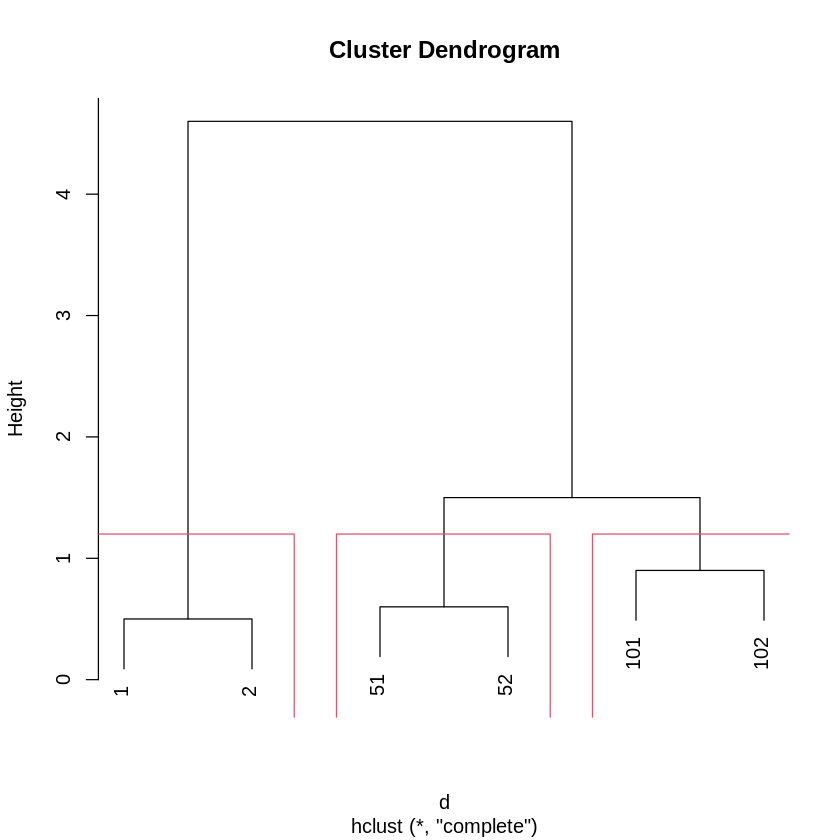

In [13]:
# hierarchical clustering
hc <- hclust(d)
plot(hc)
rect.hclust(hc, 3)

In [14]:
# divide the results into three groups
cl.hc <- cutree(hc, k = 3)
cl.hc

1   2  51  52 101 102 
  1   1   2   2   3   3

In [15]:
# cluster all the data in the iris dataset using hclust and compare it with iris$Species
d <- dist(iris[, 1:4])
hc <- hclust(d)
cl.hc <- cutree(hc, k = 3)
table(iris$Species, cl.hc)

            cl.hc
              1  2  3
  setosa     50  0  0
  versicolor  0 23 27
  virginica   0 49  1

### Kmeans(centric-based clustering)

In [16]:
# Observe the clustering results and compare them with the results from hclust.
cl.km <- kmeans(iris[,1:4], centers = 3)$cluster
table(iris$Species, cl.km)
# There is randomness, and it doesn't necessarily result in a good separation every time

            cl.km
              1  2  3
  setosa      0  0 50
  versicolor 48  2  0
  virginica  14 36  0

## DBSCAN Clustering with the fpc Package

DBSCAN doesn't require to specify the number of clusters beforehand. Instead, it identifies clusters based on proximity using `eps` (radius) and `MinPts` (minimum points).

### Understanding Parameters

Key DBSCAN parameters:

- `eps`: Radius for identifying neighboring data points.
- `MinPts`: Minimum points needed to form a cluster. Fewer points within `eps` classify as outliers.

### Randomness and Variability

DBSCAN exhibits some randomness, leading to slightly different clusterings in multiple runs. This flexibility is advantageous when the number of clusters isn't predetermined.


In [17]:
# install.packages("fpc")
library(fpc)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘modeltools’, ‘DEoptimR’, ‘mclust’, ‘flexmix’, ‘prabclus’, ‘diptest’, ‘robustbase’, ‘kernlab’




In [18]:
# 0 represents data points that do not belong to any of the identified clusters and are considered as noise in the dataset.
cl.db <- dbscan(iris[,1:4], 0.42)$cluster
table(iris$Species, cl.db)

            cl.db
              0  1  2  3
  setosa      2 48  0  0
  versicolor 10  0 37  3
  virginica  17  0  0 33

# Homework

In [20]:
# install.packages("mlbench")
library(mlbench)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [21]:
set.seed(1)
shapes <- mlbench.shapes(500)
table(shapes$classes)
d.shapes <- dist(shapes$x)


  1   2   3   4 
125 125 125 125 

Please use the default parameters of `hclust` to generate a clustering result with 4 clusters.

In [24]:
hc <- hclust(d.shapes)


Call:
hclust(d = d.shapes)

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 500 


Please use `kmeans` with the provided `centers` parameter to obtain cluster results.

`centers = shapes$x[c(1,126,251, 376),]`

In [25]:
cl.km1 <- kmeans(shapes$x, shapes$x[c(1,126,251, 376), ])$cluster
table(shapes$class, cl.km1)

   cl.km1
      1   2   3   4
  1 125   0   0   0
  2   0 125   0   0
  3   0   0 125   0
  4   0   0   0 125

Please compare the difference between setting the centers using the `kmeans` function and letting `kmeans` learn the cluster centroids on its own.

In [26]:
cl.km2 <- kmeans(shapes$x, centers = 4)$cluster
table(shapes$class, cl.km2)

   cl.km2
      1   2   3   4
  1   0   0 125   0
  2 125   0   0   0
  3   0   0   0 125
  4   0 125   0   0

Please use `dbscan` with the parameter `eps = 0.5` to create a cluster result.

   cl.db
      0
  1 125
  2 125
  3 125
  4 125

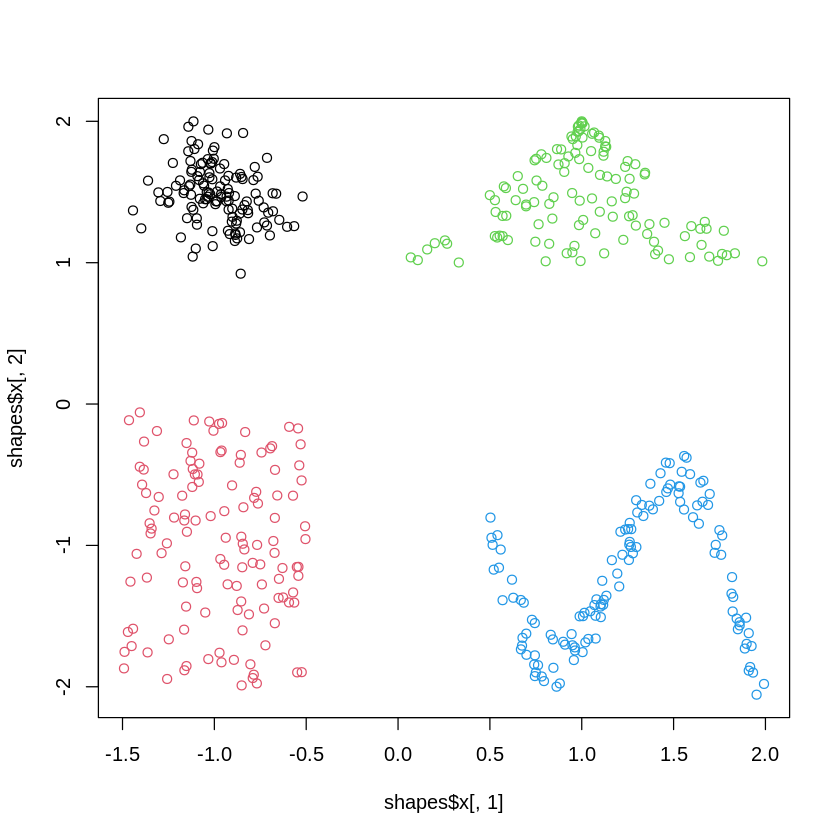

In [27]:
cl.db <- dbscan(shapes$x, -.5)$cluster
table(shapes$class, cl.db)

plot(shapes$x[, 1], shapes$x[, 2], col = shapes$class)